<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
 

<strong>Objectives:</strong>
+ Variables significativas para el clustering de productos
    
    
<strong>Conclusions:</strong>

   
</div>

In [7]:
import os, sys

def get_root_path(search_word):
    """ Búsqueda hacia atrás de un directorio con nombre search_word. """
    cwd = os.getcwd()
    while str(os.getcwd()).split('/')[-1] != search_word:
        os.chdir("..")
        cwd = os.getcwd()
    return cwd

ROOT_DIR = get_root_path('TFM_StockForecast')

sys.path.insert(0, ROOT_DIR) # Poner en el primer lugar del PATH (evitar paquetes con mismos nombres en otros directorios)

In [8]:
import pandas as pd
import numpy as np
from src.load_data import load_clustering_data, load_data
from src.prepare_data import prepare_train_data
from src.trainer import data_producto
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
main_df = load_data()

===================  LOAD DATASET stock ====================
Reading CSV in data/raw/03_TablaStock.csv...
=============  CLEAN CSV  ==============
Set columns to lowcase.
Sort values by date.
Dropped duplicates. Rows dropped: 628.
============  CLEAN STOCK  =============
Dropped rows with data from products with no stock data or out-of-date (descatalogados). Rows dropped: 1082
[WARNING] Number of dates missings:                                83
[WARNING] Number of dates missings (droping sundays and festivos): 63
[WARNING] Stock data with different units for same product & data. Rows: 13017
Dataset stock loaded. Shape: (26220, 3)

===================  LOAD DATASET ventas ===================
Reading CSV in data/raw/01_TablaVentas.csv...
=============  CLEAN CSV  ==============
Set columns to lowcase.
Sort values by date.
Dropped duplicates. Rows dropped: 0.
============  CLEAN VENTAS  ============
Dropped rows with data from products with no stock data or out-of-date (descatalogados). 

/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/create_variables.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['missing'] = (ts.udsstock.isna()) * 1
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/create_variables.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data["roll4wd_" + col] = day_data.loc[(day_data.festivo == 0), col].rolling(4, win_type='triang', min_periods=1).mean()
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/create_va

Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for

Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by 

Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last

Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and 

Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by 

Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by 

Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last

Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by 

Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for

Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last

Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by 

Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for

Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by 

Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by 

In [10]:
main_df

,fecha,producto,udsstock,udsventa,udsprevisionempresa,promo,festivo,weekday,quarter,month,...,summer,autumn,winter,stockMissingType,roll4wd_udsventa,meanwd_udsventa,roll4wd_udsstock,meanwd_udsstock,roll4wd_udsprevisionempresa,meanwd_udsprevisionempresa
0,2019-06-05,1,18275.0,2833.0,102304.0,0.0,0.0,2,2,6,...,1,0,0,0.0,2833.000000,3405.131579,18275.00,11012.218750,102304.000,37273.000000
1,2019-06-05,10,2267.0,1874.0,36888.0,1.0,0.0,2,2,6,...,1,0,0,0.0,1874.000000,2440.763158,2267.00,1822.161290,36888.000,10102.540541
2,2019-06-05,11,2506.0,2755.0,31078.0,0.0,0.0,2,2,6,...,1,0,0,0.0,2755.000000,2323.135135,2506.00,3987.666667,31078.000,10973.815789
3,2019-06-05,12,1279.0,1161.0,33661.0,0.0,0.0,2,2,6,...,1,0,0,0.0,1161.000000,1143.368421,1279.00,1605.741935,33661.000,5724.236842
4,2019-06-05,13,2493.0,1603.0,32119.0,1.0,0.0,2,2,6,...,1,0,0,0.0,1603.000000,1874.447368,2493.00,3113.843750,32119.000,8500.421053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21307,2020-03-26,91,38.0,NaN,272.0,0.0,0.0,3,1,3,...,0,0,1,0.0,1284.714286,415.350000,31.25,97.185185,1219.125,1593.512821
21308,2020-03-26,94,947.0,NaN,229.0,0.0,0.0,3,1,3,...,0,0,1,0.0,548.142857,249.850000,574.25,543.500000,1145.750,1179.225000
21309,2020-03-26,96,465.0,NaN,266.0,1.0,0.0,3,1,3,...,0,0,1,0.0,460.571429,285.675000,737.25,491.931034,1327.125,1399.375000
21310,2020-03-26,97,395.0,NaN,235.0,0.0,0.0,3,1,3,...,0,0,1,0.0,151.857143,346.375000,434.00,310.258065,1177.750,1569.974359


# Enfoques

In [11]:
def data_producto(data, prod, target):
    data = data.loc[data.producto == prod]
    data = prepare_train_data(data)

    data = data.loc[data.stockMissingType == 0].reset_index(drop=True)
    
    variables = ["fecha", 'producto','udsprevisionempresa','udsventa_shifted1', target]
    
    if target == 'udsstock':
        variables += ['udsstock_shifted1']
    
    data = data[variables]

    return data

In [12]:
from sklearn.ensemble import RandomForestRegressor
from src.trainer import run

def unit_train(data, productos, target="udsstock"):
    tags = {"type":"monoproducto",
            "base_model": "random_forest",
            "target":target}
    params = {"n_estimators":200}
    predict_all = pd.DataFrame({})
    for prod in productos:
        tags["name"] = "PR" + prod
        
        data_prod = data_producto(data, prod, target)
        
        base_model = RandomForestRegressor(n_estimators=200)
        
        _, _, predict = run(data_prod, target, base_model, params, tags)
        
        predict_all = pd.concat([predict_all, predict])
        
    return predict_all


# for target in ['udsstock','udsstock_shifted1','udsstock_shifted7']
# data_prod = data_producto(main_df, "30", target)
predict = unit_train(main_df, ["30","32","42","48"], "udsstock")
predict2 = unit_train(main_df, ["30","32","42","48"], "udsstock_diff1")
predict3 = unit_train(main_df, ["30","32","42","48"], "udsstock_diff7")

===================  FILTER TRAIN DATA  ====================
Dropped rows corresponding to 23 to 26-03-2020 for not having the ventas data for these days.
Rows dropped: 4
Assigned missings in udsventa.
Assigned missings in udsprevisionempresa filling with 0
Assigning missings for udsstock
Missing in dataset:               97 (292 total rows).
Missings in holiday days:         23 (50 total rows).
Missings in working days:         74 (242 total rows).
Assigned missings for working days data with the 4last wd rolling window - Remaining missings: 29
Assigned left missings for working days data with the mean of the weekday - Remaining missings: 23
Assigned missings for holiday data and no active business data - Remaining missings:      0
Get shifted variable for udsprevisionempresa with period -1
Get shifted variable for udsprevisionempresa with period -2
Get shifted variable for udsprevisionempresa with period -3
Get shifted variable for udsprevisionempresa with period -4
Get shifted varia

/home/plombao/miniconda3/envs/ds_all/lib/python3.7/site-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Model trained in 0.3768148422241211 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (20, 3)
**********************************************************************
{'mean_error': -60.9915, 'std_error': 630.0966079659928, 'r2': -0.03178059186990789, 'predict_out': array([1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1]), 'mae': 473.1125, 'rmse': 608.8765835885791, 'mape': 223.74361257703046, 'smape': 55.45709941118163, 'acc': 0, 'mase': nan, 'mase_wd': nan, 'train_time': 0.3768148422241211, 'mean_inference_time': 0.001190948486328125, 'train_size': 175, 'test_size': 20}
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (175, 3)
******************************************************************

/home/plombao/miniconda3/envs/ds_all/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/plombao/miniconda3/envs/ds_all/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: too many values to unpack (expected 3)

In [14]:
values = pd.read_csv("reports/enfoques/runs.csv")

values["producto"] = ["48","42","32","30"]*3
values["target"] = ["udsstock_diff7"]*4 + ["udsstock_diff1"]*4 + ["udsstock"]*4

values

,Run ID,Name,Source Type,Source Name,User,Status,n_estimators,mae_mean,mae_std,mape_mean,...,mean_error_mean,mean_error_std,rmse_mean,rmse_std,smape_mean,smape_std,std_error_mean,std_error_std,producto,target
0,35eb0b2395a94422869ec2b436bfb192,NaN,LOCAL,/home/plombao/miniconda3/envs/ds/lib/python3.8...,plombao,FINISHED,200,282.650733,61.322231,inf,...,-23.011024,79.211875,352.785501,85.315998,33.259651,5.336666,340.966106,93.137081,48,udsstock_diff7
1,5c3afb7170ef44b5aca719e87592f5cd,NaN,LOCAL,/home/plombao/miniconda3/envs/ds/lib/python3.8...,plombao,FINISHED,200,295.559756,46.751194,inf,...,0.546414,58.445280,382.980946,61.163366,37.460562,6.683527,379.000057,57.949715,42,udsstock_diff7
2,a1e399994d8c4f5cbeeb7cf49d0ea85a,NaN,LOCAL,/home/plombao/miniconda3/envs/ds/lib/python3.8...,plombao,FINISHED,200,318.021794,38.774534,inf,...,14.199546,69.286666,431.698943,50.456886,29.476182,3.588346,426.012921,49.199568,32,udsstock_diff7
3,08be85c85b3d4ff9b2908f1c69805252,NaN,LOCAL,/home/plombao/miniconda3/envs/ds/lib/python3.8...,plombao,FINISHED,200,291.296422,69.103366,inf,...,-16.958953,54.462470,371.571297,73.543808,28.574224,7.892768,366.665671,76.002893,30,udsstock_diff7
4,c527118ac4ec4895a2dd79d0b0b0d549,NaN,LOCAL,/home/plombao/miniconda3/envs/ds/lib/python3.8...,plombao,FINISHED,200,310.780428,54.461473,inf,...,0.487845,69.709659,398.752513,86.486034,33.960277,5.042584,391.905043,89.633498,48,udsstock_diff1
5,70f6bc283382497cb387699262b47a7b,NaN,LOCAL,/home/plombao/miniconda3/envs/ds/lib/python3.8...,plombao,FINISHED,200,287.226152,33.514076,inf,...,-33.244692,79.556314,358.990675,43.299330,37.148312,3.160234,348.408063,43.892394,42,udsstock_diff1
6,748e4be73a154ea0b8e85f83b66956b3,NaN,LOCAL,/home/plombao/miniconda3/envs/ds/lib/python3.8...,plombao,FINISHED,200,295.904363,31.550691,inf,...,-4.345599,56.640466,390.985463,34.655845,27.524971,3.591285,386.852222,34.481749,32,udsstock_diff1
7,7a2ed7b120ef42e0a875786e26f9cbde,NaN,LOCAL,/home/plombao/miniconda3/envs/ds/lib/python3.8...,plombao,FINISHED,200,301.558075,45.488864,inf,...,-3.558673,80.328348,380.637130,39.166853,28.992161,4.699285,372.057510,39.071325,30,udsstock_diff1
8,9bde0573e0de4cf1bcbfbc8a84e72949,NaN,LOCAL,/home/plombao/miniconda3/envs/ds/lib/python3.8...,plombao,FINISHED,200,277.458057,63.221630,40.498616,...,-4.992067,101.175246,360.348245,86.581126,29.612494,5.393807,346.227999,84.923323,48,udsstock
9,549484293ac24f0381aa72d4efd0b3d3,NaN,LOCAL,/home/plombao/miniconda3/envs/ds/lib/python3.8...,plombao,FINISHED,200,266.016218,28.757659,46.123276,...,14.669322,67.924928,350.527735,31.845893,33.403031,3.491659,343.025867,37.257529,42,udsstock


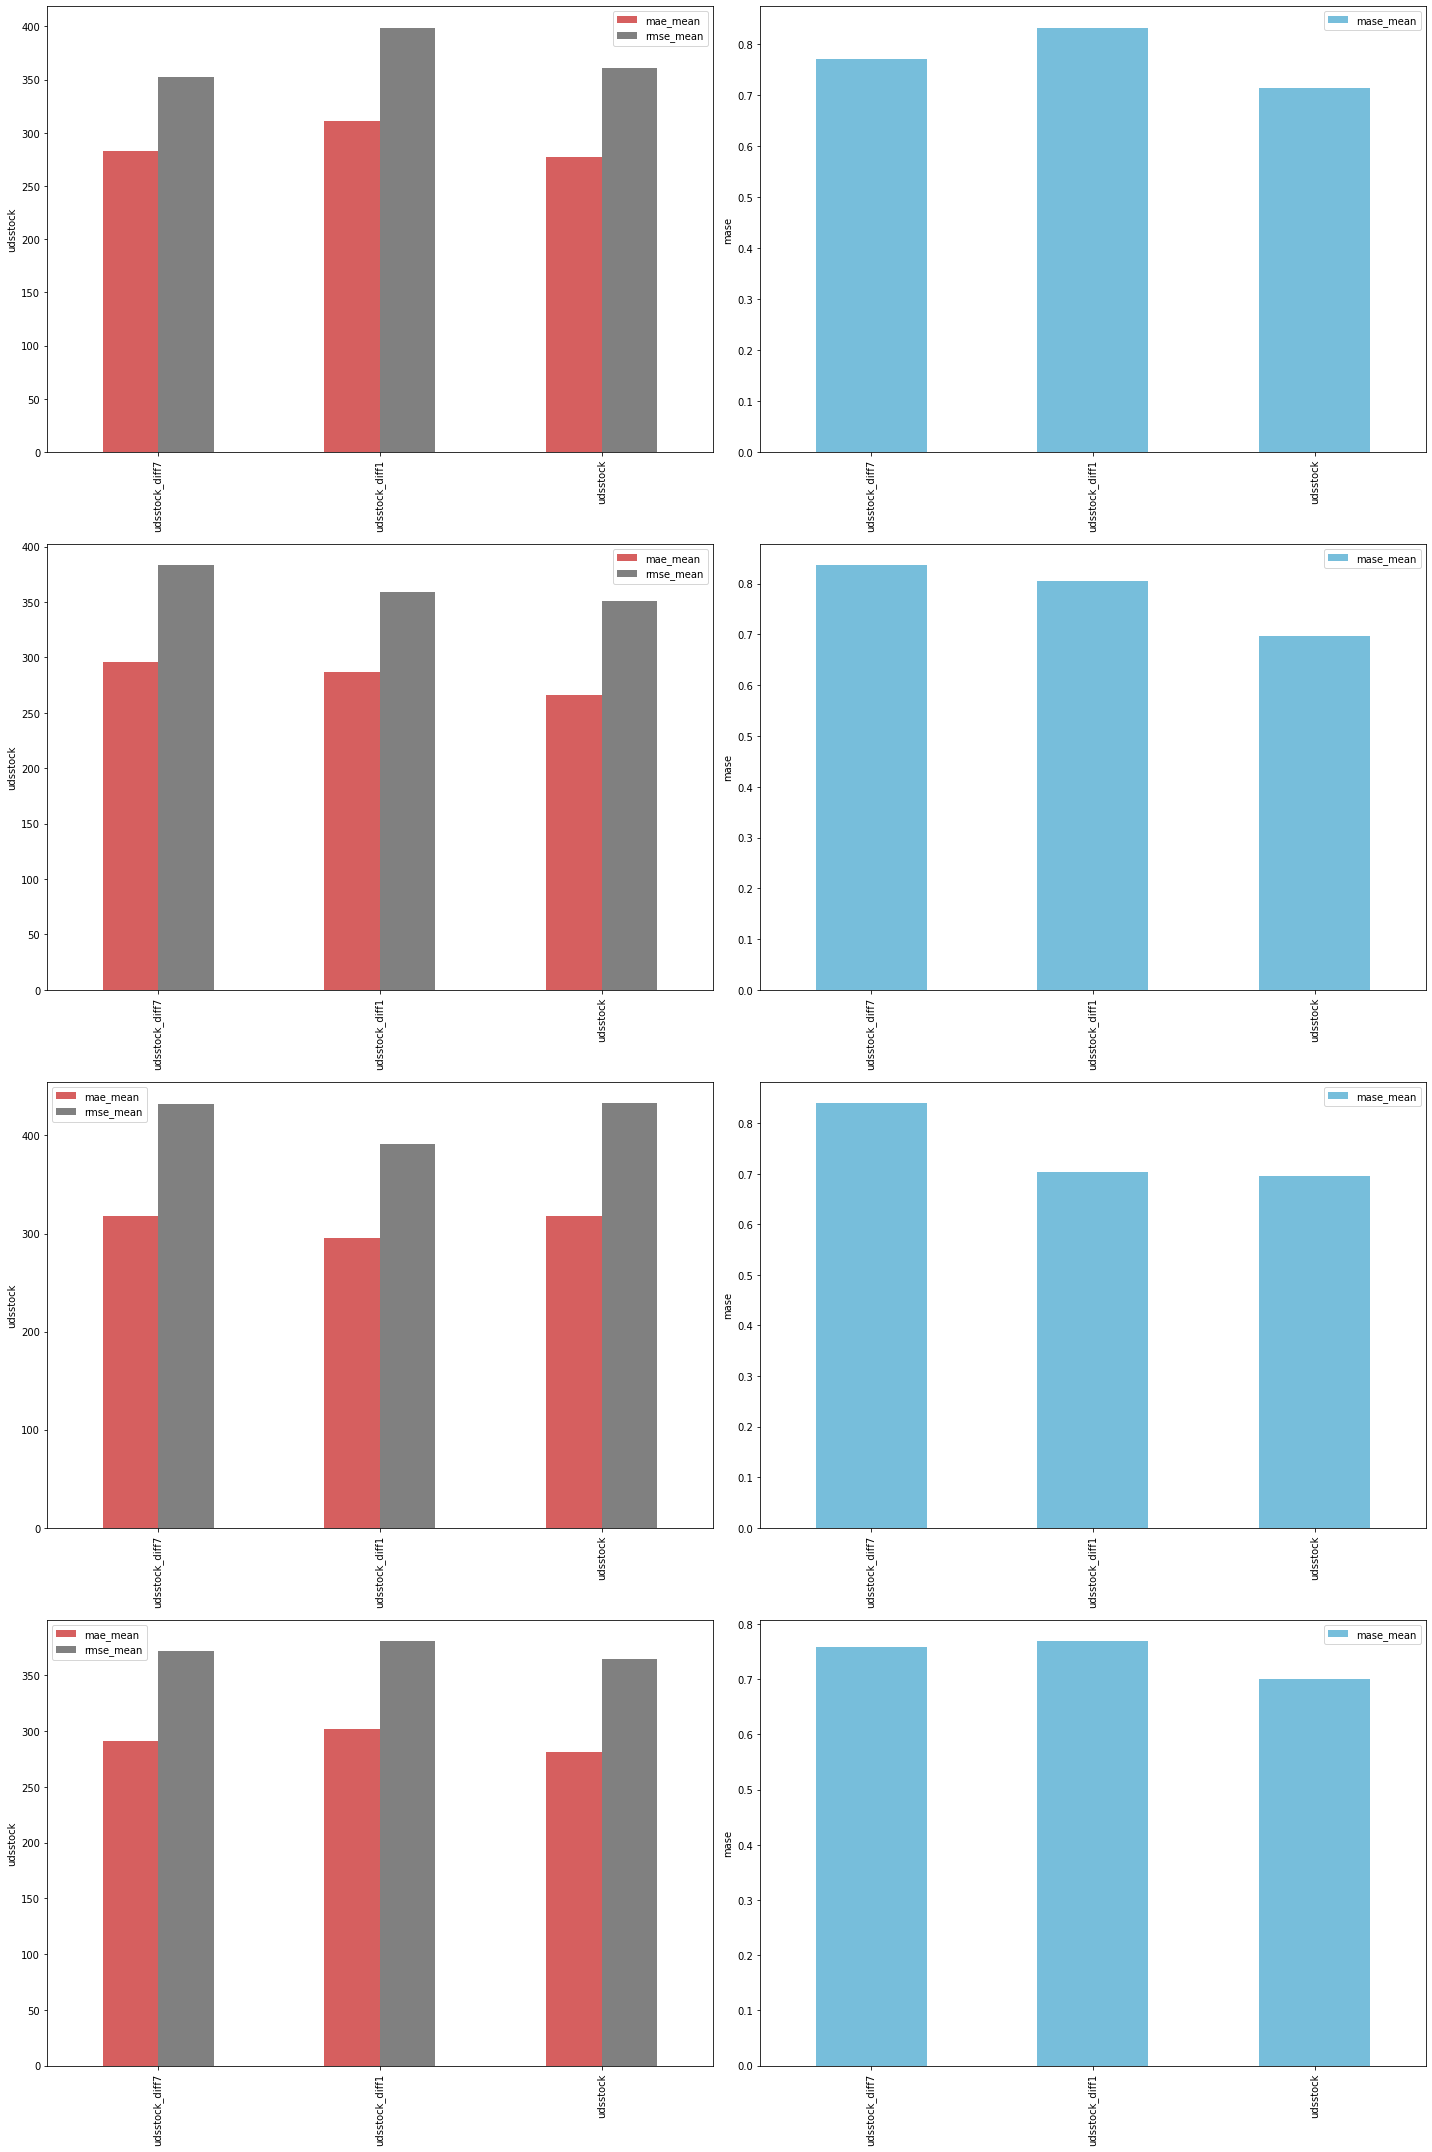

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=2)
i = 0
for product in ["48","42","32","30"]:
    metrics = values[values.producto == product].set_index("target")
    metrics[["mae_mean","rmse_mean"]].plot(figsize=(20,30),ax=axes[i,0], kind='bar', color=["#D65F5F", "grey"])
    axes[i,0].set_ylabel("udsstock")
    axes[i,0].set_xlabel("")

    metrics[["mase_mean"]].plot(figsize=(20,30),ax=axes[i, 1], kind='bar', color=["#77BEDB"])
    axes[i, 1].set_ylabel("mase")
    axes[i, 1].set_xlabel("")
    i += 1
plt.tight_layout()
plt.savefig("reports/enfoques/comparativa.png")   

In [15]:
predict3 = unit_train(main_df, ["30"], "udsstock_shifted7")

===================  FILTER TRAIN DATA  ====================
Dropped rows corresponding to 23 to 26-03-2020 for not having the ventas data for these days.
Rows dropped: 4
Assigned missings in udsventa.
Assigned missings in udsprevisionempresa filling with 0
Assigning missings for udsstock
Missing in dataset:               97 (292 total rows).
Missings in holiday days:         23 (50 total rows).
Missings in working days:         74 (242 total rows).
Assigned missings for working days data with the 4last wd rolling window - Remaining missings: 29
Assigned left missings for working days data with the mean of the weekday - Remaining missings: 23
Assigned missings for holiday data and no active business data - Remaining missings:      0
Get shifted variable for udsprevisionempresa with period -1
Get shifted variable for udsprevisionempresa with period -2
Get shifted variable for udsprevisionempresa with period -3
Get shifted variable for udsprevisionempresa with period -4
Get shifted varia

/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/validate.py:34: RuntimeWarning: divide by zero encountered in true_divide
  metrics["mape"] = np.mean(np.abs(actual - pred) / actual) * 100


Model trained in 0.5334763526916504 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (35, 2)
**********************************************************************
===============================  TRAINING MODEL  ===============================
Starting training...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (140, 2)
**********************************************************************


/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/validate.py:34: RuntimeWarning: divide by zero encountered in true_divide
  metrics["mape"] = np.mean(np.abs(actual - pred) / actual) * 100


Model trained in 0.5477457046508789 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (35, 2)
**********************************************************************
===============================  TRAINING MODEL  ===============================
Starting training...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (140, 2)
**********************************************************************
Model trained in 0.5992574691772461 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (35, 2)
*********************

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Model trained in 0.6268281936645508 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (20, 2)
**********************************************************************
{'mean_error': 15.810667699758188, 'std_error': 432.3504756846288, 'r2': -0.9175511266811571, 'predict_out': array([ 1,  1,  0,  1,  0,  1,  0,  1,  1,  0, 10,  2,  1,  1,  1,  1,  7,
        1,  2,  0]), 'mae': 369.8437632334729, 'rmse': 481.5087755640169, 'mape': 51.42462108462532, 'smape': 36.915054318106556, 'acc': 48.57537891537468, 'mase': nan, 'mase_wd': nan, 'train_time': 0.6268281936645508, 'mean_inference_time': 0.0018461346626281738, 'train_size': 175, 'test_size': 20, 'features': 2}
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [13]:
prod = "30"
data30 = main_df.loc[main_df.producto == prod]

data30 = data30[['fecha', 'producto', 'udsstock','stockMissingType','roll4wd_udsstock']]

def _get_shifted(prod_data, column, period):
    col_name = column + "_shifted" + str(period) 
    prod_data[col_name] = prod_data[column].shift(periods=period, fill_value=0)
    print("Get shifted variable for {} with period {}".format(column, period))
    return prod_data

data30 = _get_shifted(data30, 'udsstock', period =1)
data30 = _get_shifted(data30, 'udsstock', period =7)

data30 = data30.loc[data30.stockMissingType == 0].set_index("fecha")

data30.columns

Get shifted variable for udsstock with period 1
Get shifted variable for udsstock with period 7


Index(['producto', 'udsstock', 'stockMissingType', 'roll4wd_udsstock',
       'udsstock_shifted1', 'udsstock_shifted7'],
      dtype='object')

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
def get_metrics(actual, pred):
    metrics = {}
    actual, pred = np.array(actual), np.array(pred)
    # Scale dependant metrics
    metrics["mae"] = mean_absolute_error(actual,pred)
    metrics["rmse"] = sqrt(mean_squared_error(actual,pred))

    # Percentage metrics
    metrics["mape"] = np.mean(np.abs(actual - pred) / actual) * 100
    metrics["smape"] = np.mean(np.abs(actual - pred) / (actual + pred)) * 200
    metrics["acc"] = 100 - metrics["mape"]
    metrics["sacc"] = 100 - metrics["smape"]
    
    return metrics

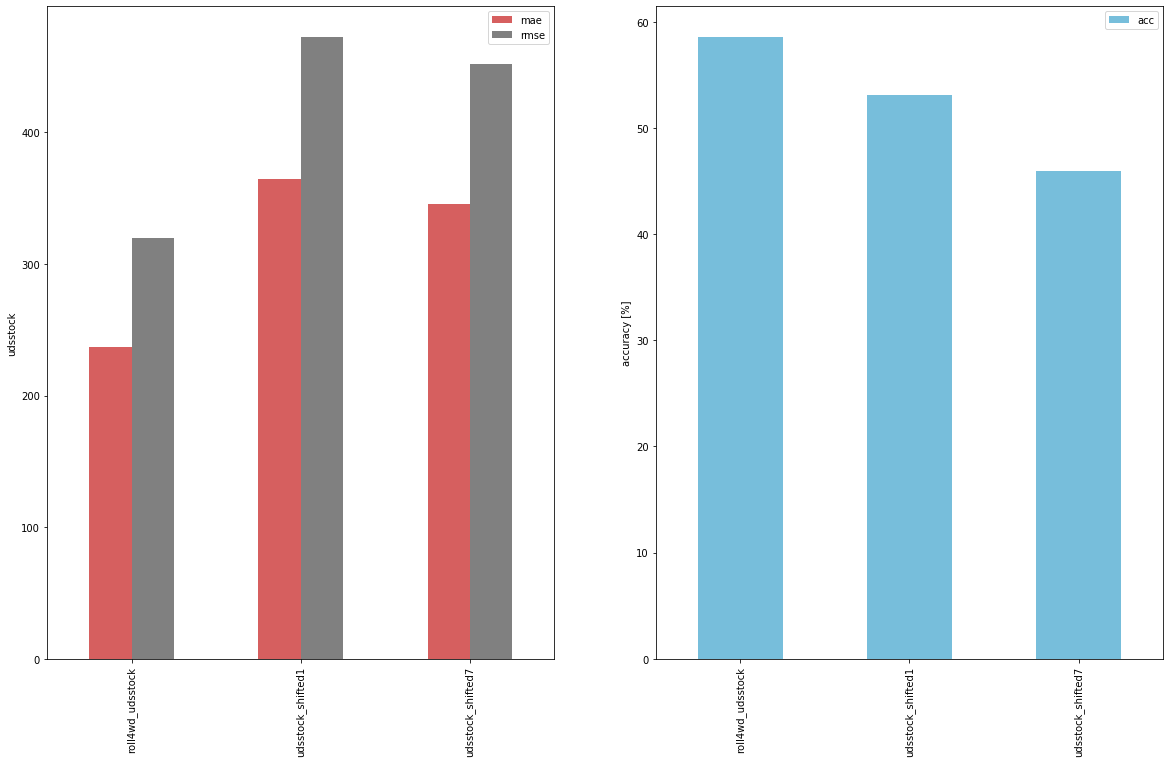

In [48]:
data30 = data30.loc[data30.stockMissingType == 0]

metrics = []
for value in ['roll4wd_udsstock', "udsstock_shifted1", "udsstock_shifted7"]:
    subdata = data30.loc[~data30[value].isna()]
    metric = get_metrics(subdata.udsstock, subdata[value])
    metric["method"] = value
    metrics.append(metric)
    
metrics = pd.DataFrame(metrics).set_index("method")
    
fig, axes = plt.subplots(nrows=1, ncols=2)
metrics[["mae","rmse"]].plot(figsize=(20,12),ax=axes[0], kind='bar', color=["#D65F5F", "grey"])
axes[0].set_ylabel("udsstock")
axes[0].set_xlabel("")
metrics[["acc"]].plot(figsize=(20,12),ax=axes[1], kind='bar', color=["#77BEDB"])
axes[1].set_ylabel("accuracy [%]")
axes[1].set_xlabel("")
plt.savefig("reports/naive/naive_methods.png")

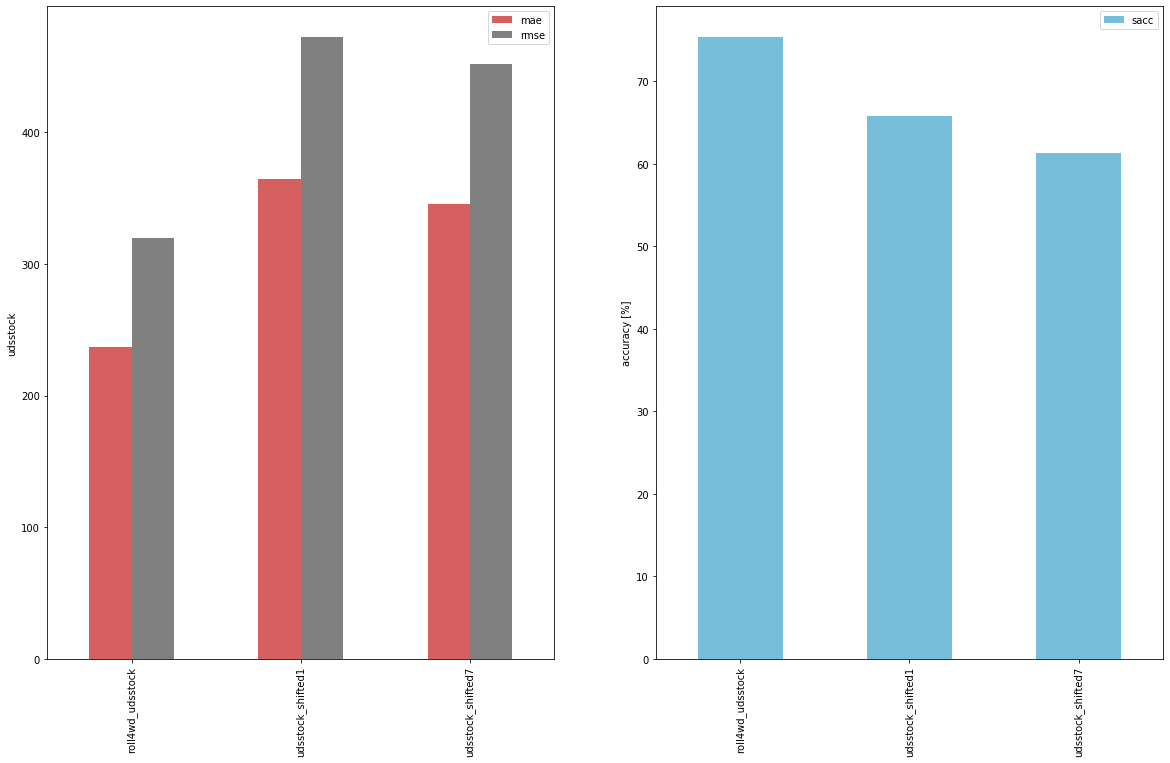

In [49]:
data30 = data30.loc[data30.stockMissingType == 0]

metrics = []
for value in ['roll4wd_udsstock', "udsstock_shifted1", "udsstock_shifted7"]:
    subdata = data30.loc[~data30[value].isna()]
    metric = get_metrics(subdata.udsstock, subdata[value])
    metric["method"] = value
    metrics.append(metric)
    
metrics = pd.DataFrame(metrics).set_index("method")
    
fig, axes = plt.subplots(nrows=1, ncols=2)
metrics[["mae","rmse"]].plot(figsize=(20,12),ax=axes[0], kind='bar', color=["#D65F5F", "grey"])
axes[0].set_ylabel("udsstock")
axes[0].set_xlabel("")
metrics[["sacc"]].plot(figsize=(20,12),ax=axes[1], kind='bar', color=["#77BEDB"])
axes[1].set_ylabel("accuracy [%]")
axes[1].set_xlabel("")
plt.savefig("reports/naive/naive_methods.png")

# Entrenamiento de un modelo analitico

In [10]:
from src.trainer import run
from sklearn.ensemble import RandomForestRegressor

def data_producto(data, prod):
    data = data.loc[data.producto == prod]
    data = prepare_train_data(data)

    data = data.loc[data.stockMissingType == 0].reset_index(drop=True)

    data = data[['fecha','producto','udsstock','udsstock_shifted1', 'udsprevisionempresa','udsventa_shifted1']]

    # data = data[["fecha","producto","udsventa","udsprevisionempresa",
    #              "promo", "sin_weekday", "cos_weekday",
    #              "quarter", 'month','udsstock','udsprevisionempresa_shifted1', 'udsprevisionempresa_shifted2',
    #             'udsstock_diff7',"udsventa_diff1", "udsstock_shifted-1"]]

    return data

data_prod = data_producto(main_df, "30")

data_prod.columns

===================  FILTER TRAIN DATA  ====================
Dropped rows corresponding to 23 to 26-03-2020 for not having the ventas data for these days.
Rows dropped: 4
Assigned missings in udsventa.
Assigned missings in udsprevisionempresa filling with 0
Assigning missings for udsstock
Missing in dataset:               97 (292 total rows).
Missings in holiday days:         23 (50 total rows).
Missings in working days:         74 (242 total rows).
Assigned missings for working days data with the 4last wd rolling window - Remaining missings: 29
Assigned left missings for working days data with the mean of the weekday - Remaining missings: 23
Assigned missings for holiday data and no active business data - Remaining missings:      0
Get shifted variable for udsprevisionempresa with period -1
Get shifted variable for udsprevisionempresa with period -2
Get shifted variable for udsprevisionempresa with period -3
Get shifted variable for udsprevisionempresa with period -4
Get shifted varia

Index(['fecha', 'producto', 'udsstock', 'udsstock_shifted1',
       'udsprevisionempresa', 'udsventa_shifted1'],
      dtype='object')

In [50]:


def unit_train(data, productos, target="udsstock"):
    tags = {"type":"monoproducto",
            "base_model": "random_forest",
            "target":target}
    params = {"n_estimators":200}
    predict_all = pd.DataFrame({})
    for prod in productos:
        tags["name"] = "PR" + prod
        
        data_prod = data_producto(data, prod)
        
        base_model = RandomForestRegressor(n_estimators=200)
        
        _, _, predict = run(data_prod, target, base_model, params, tags)
        
        predict_all = pd.concat([predict_all, predict])
        
    return predict_all

predict = unit_train(main_df, ["30"])

===================  FILTER TRAIN DATA  ====================
Dropped rows corresponding to 23 to 26-03-2020 for not having the ventas data for these days.
Rows dropped: 4
Assigned missings in udsventa.
Assigned missings in udsprevisionempresa filling with 0
Assigning missings for udsstock
Missing in dataset:               97 (292 total rows).
Missings in holiday days:         23 (50 total rows).
Missings in working days:         74 (242 total rows).
Assigned missings for working days data with the 4last wd rolling window - Remaining missings: 29
Assigned left missings for working days data with the mean of the weekday - Remaining missings: 23
Assigned missings for holiday data and no active business data - Remaining missings:      0
Get shifted variable for udsprevisionempresa with period -1
Get shifted variable for udsprevisionempresa with period -2
Get shifted variable for udsprevisionempresa with period -3
Get shifted variable for udsprevisionempresa with period -4
Get shifted varia

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Model trained in 0.254408597946167 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (20, 3)
**********************************************************************
{'mean_error': -63.182250000000046, 'std_error': 629.7770365007663, 'r2': 0.021445523993856797, 'predict_out': array([1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1]), 'mae': 460.32825, 'rmse': 592.9636880271422, 'mape': 224.20953738903995, 'smape': 55.49291449181201, 'mase': nan, 'mase_wd': nan, 'train_time': 0.254408597946167, 'mean_inference_time': 0.0008875489234924317, 'train_size': 175, 'test_size': 20, 'features': 3}
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (175, 3)
**************************************************

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [40]:
def plot_interval(ax, value, delta, color):
    ax.hlines(value, xmin=-1, xmax=3, colors = color,linewidth=3)
    x = np.array([-1, 0,1,2,3])
    y_min = np.ones(5) * (value-delta)
    y_max = np.ones(5) * (value+delta)
    ax.fill_between(x, y_min, y_max, alpha=0.2, color=color)
    
    

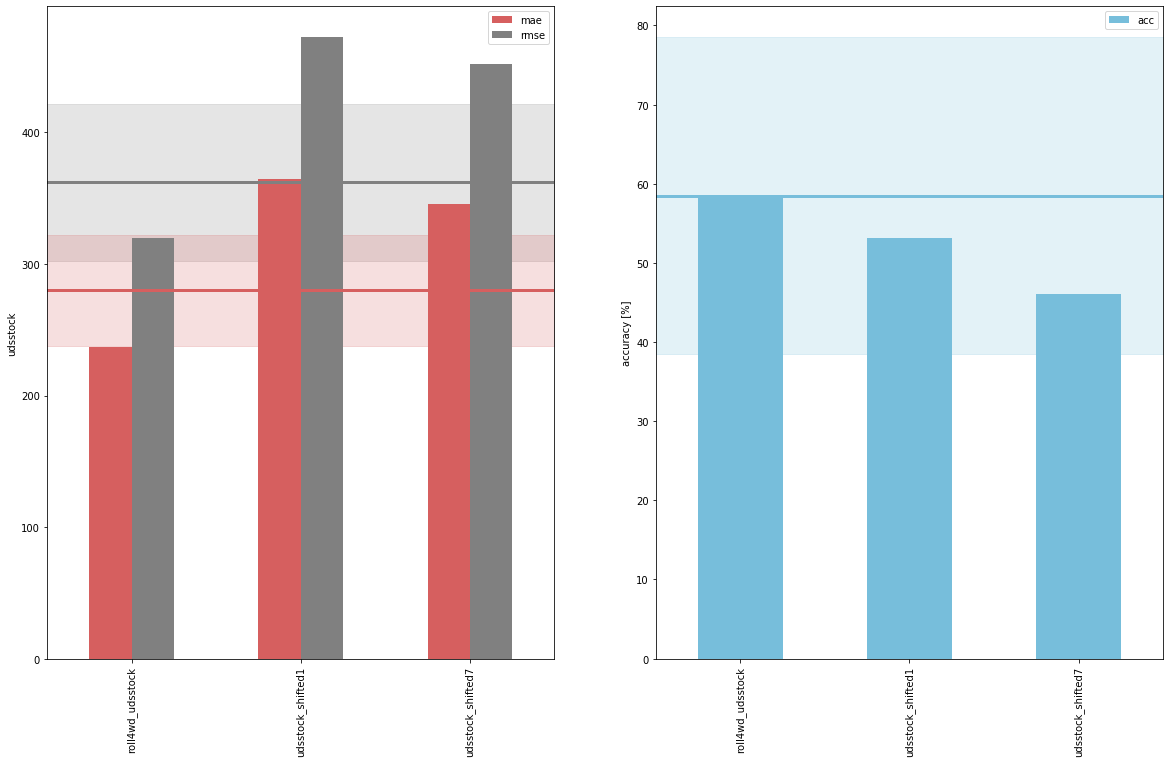

In [45]:
data30 = data30.loc[data30.stockMissingType == 0]

metrics = []
for value in ['roll4wd_udsstock', "udsstock_shifted1", "udsstock_shifted7"]:
    subdata = data30.loc[~data30[value].isna()]
    metric = get_metrics(subdata.udsstock, subdata[value])
    metric["method"] = value
    metrics.append(metric)
    
metrics = pd.DataFrame(metrics).set_index("method")
    
fig, axes = plt.subplots(nrows=1, ncols=2)
metrics[["mae","rmse"]].plot(figsize=(20,12),ax=axes[0], kind='bar', color=["#D65F5F", "grey"])
plot_interval(axes[0], 362, 60, 'grey')
plot_interval(axes[0], 280, 42, '#D65F5F')
axes[0].set_ylabel("udsstock")
axes[0].set_xlabel("")
metrics[["acc"]].plot(figsize=(20,12),ax=axes[1], kind='bar', color=["#77BEDB"])
plot_interval(axes[1], 58.5, 20, '#77BEDB')
axes[1].set_ylabel("accuracy [%]")
axes[1].set_xlabel("")
plt.savefig("reports/naive/naive_methods2.png")

In [63]:
predict["naive"] = predict["y_real"].shift(1)

predict

,y_pred,y_real,type,fecha,producto,naive
0,1105.420,1266.0,train,2019-06-05,30,NaN
1,990.425,849.0,train,2019-06-11,30,1266.0
2,1298.100,1508.0,train,2019-06-12,30,849.0
3,1614.585,1938.0,train,2019-06-13,30,1508.0
4,1360.670,1356.0,train,2019-06-14,30,1938.0
...,...,...,...,...,...,...
190,974.720,39.0,test,2020-03-17,30,211.0
191,1189.360,762.0,test,2020-03-19,30,39.0
192,1002.655,1511.0,test,2020-03-20,30,762.0
193,959.755,2275.0,test,2020-03-21,30,1511.0


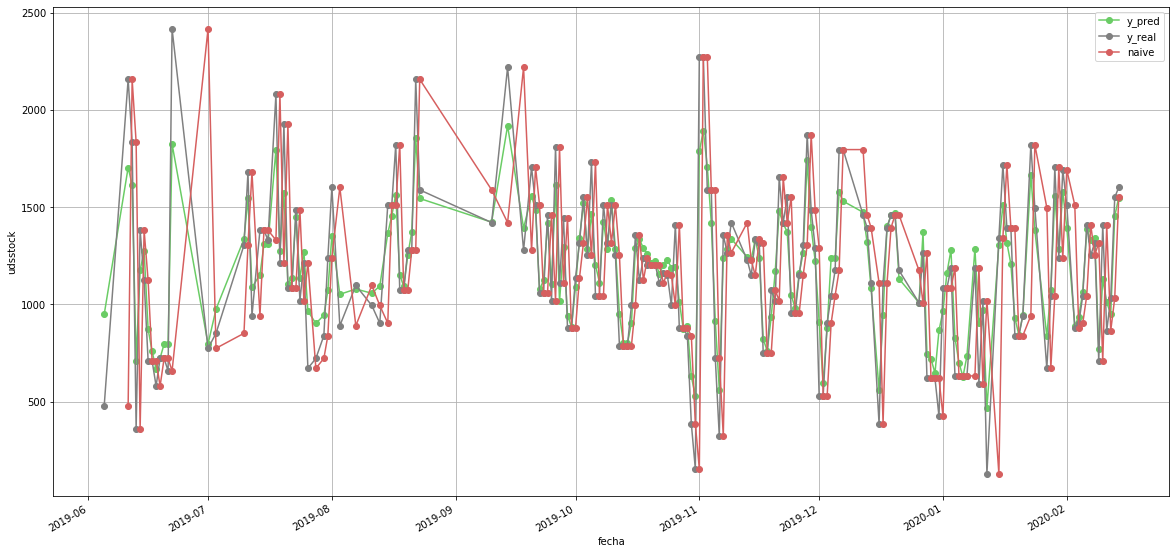

In [76]:
predict.loc[predict.type=="train"].set_index("fecha").plot(figsize=(20,10), color=["#6ACC65", "grey", "#D65F5F"],marker='o')
plt.grid()
plt.ylabel("udsstock")
plt.savefig("reports/naive/prediction_train.png")

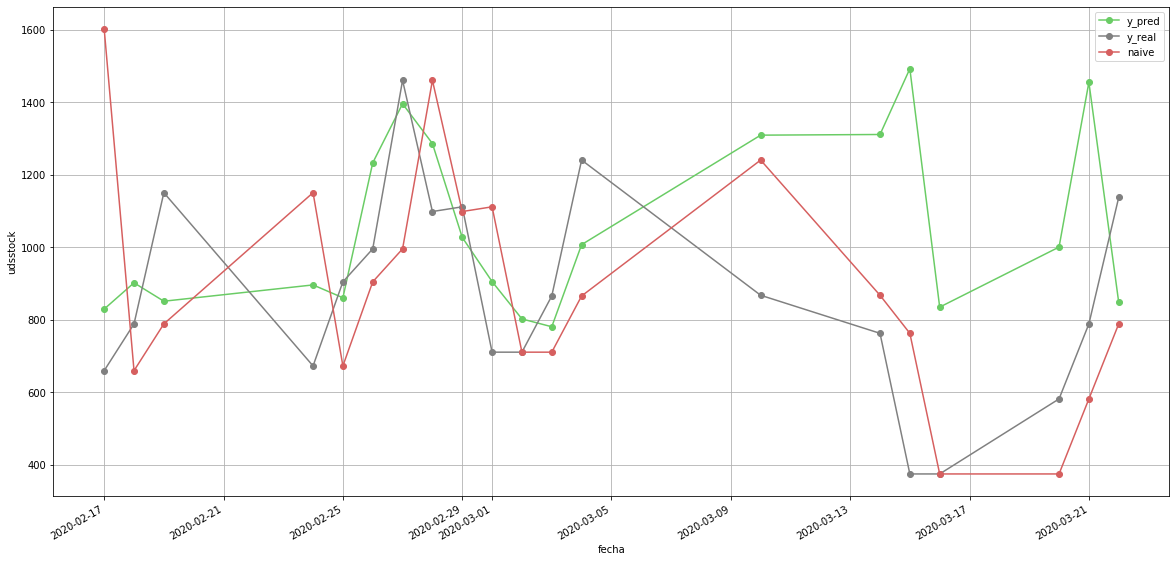

In [77]:
predict.loc[predict.type=="test"].set_index("fecha").plot(figsize=(20,10), color=["#6ACC65", "grey", "#D65F5F"],marker='o')
plt.grid()
plt.ylabel("udsstock")
plt.savefig("reports/naive/prediction_test.png")

In [66]:
# Probemos con el 32
from src.trainer import run
from sklearn.ensemble import RandomForestRegressor

def data_producto(data, prod):
    data = data.loc[data.producto == prod]
    data = prepare_train_data(data)

    data = data.loc[data.stockMissingType == 0].reset_index(drop=True)

    data = data[['fecha','producto','udsstock','udsstock_shifted1', 'udsprevisionempresa','udsventa_shifted1']]

    # data = data[["fecha","producto","udsventa","udsprevisionempresa",
    #              "promo", "sin_weekday", "cos_weekday",
    #              "quarter", 'month','udsstock','udsprevisionempresa_shifted1', 'udsprevisionempresa_shifted2',
    #             'udsstock_diff7',"udsventa_diff1", "udsstock_shifted-1"]]

    return data

data_prod = data_producto(main_df, "32")

data_prod.columns

===================  FILTER TRAIN DATA  ====================
Dropped rows corresponding to 23 to 26-03-2020 for not having the ventas data for these days.
Rows dropped: 4
Assigned missings in udsventa.
Assigned missings in udsprevisionempresa filling with 0
Assigning missings for udsstock
Missing in dataset:               93 (292 total rows).
Missings in holiday days:         20 (50 total rows).
Missings in working days:         73 (242 total rows).
Assigned missings for working days data with the 4last wd rolling window - Remaining missings: 26
Assigned left missings for working days data with the mean of the weekday - Remaining missings: 20
Assigned missings for holiday data and no active business data - Remaining missings:      0
Get shifted variable for udsprevisionempresa with period -1
Get shifted variable for udsprevisionempresa with period -2
Get shifted variable for udsprevisionempresa with period -3
Get shifted variable for udsprevisionempresa with period -4
Get shifted varia

Index(['fecha', 'producto', 'udsstock', 'udsstock_shifted1',
       'udsprevisionempresa', 'udsventa_shifted1'],
      dtype='object')

In [67]:
def unit_train(data, productos, target="udsstock"):
    tags = {"type":"monoproducto",
            "base_model": "random_forest",
            "target":target}
    params = {"n_estimators":200}
    predict_all = pd.DataFrame({})
    for prod in productos:
        tags["name"] = "PR" + prod
        
        data_prod = data_producto(data, prod)
        
        base_model = RandomForestRegressor(n_estimators=200)
        
        _, _, predict = run(data_prod, target, base_model, params, tags)
        
        predict_all = pd.concat([predict_all, predict])
        
    return predict_all

predict = unit_train(main_df, ["32"])

===================  FILTER TRAIN DATA  ====================
Dropped rows corresponding to 23 to 26-03-2020 for not having the ventas data for these days.
Rows dropped: 4
Assigned missings in udsventa.
Assigned missings in udsprevisionempresa filling with 0
Assigning missings for udsstock
Missing in dataset:               93 (292 total rows).
Missings in holiday days:         20 (50 total rows).
Missings in working days:         73 (242 total rows).
Assigned missings for working days data with the 4last wd rolling window - Remaining missings: 26
Assigned left missings for working days data with the mean of the weekday - Remaining missings: 20
Assigned missings for holiday data and no active business data - Remaining missings:      0
Get shifted variable for udsprevisionempresa with period -1
Get shifted variable for udsprevisionempresa with period -2
Get shifted variable for udsprevisionempresa with period -3
Get shifted variable for udsprevisionempresa with period -4
Get shifted varia

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Model trained in 0.3383007049560547 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (20, 3)
**********************************************************************
{'mean_error': -188.59775000000002, 'std_error': 361.7050110638329, 'r2': -1.0425173265588552, 'predict_out': array([0, 0, 0, 0, 0, 2, 4, 2, 0, 0, 0, 0, 0, 3, 3, 8, 0, 0, 7, 0]), 'mae': 298.62125000000003, 'rmse': 390.86568179970726, 'mape': 49.19163698053431, 'smape': 35.03108255541507, 'mase': nan, 'mase_wd': nan, 'train_time': 0.3383007049560547, 'mean_inference_time': 0.000770413875579834, 'train_size': 179, 'test_size': 20, 'features': 3}
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (179, 3)
*****************************************

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [68]:
predict["naive"] = predict["y_real"].shift(1)

predict

,y_pred,y_real,type,fecha,producto,naive
0,948.705,478.0,train,2019-06-05,32,NaN
1,1703.725,2157.0,train,2019-06-11,32,478.0
2,1615.675,1834.0,train,2019-06-12,32,2157.0
3,711.590,362.0,train,2019-06-13,32,1834.0
4,1175.265,1382.0,train,2019-06-14,32,362.0
...,...,...,...,...,...,...
194,1491.955,374.0,test,2020-03-15,32,762.0
195,834.285,374.0,test,2020-03-16,32,374.0
196,999.930,581.0,test,2020-03-20,32,374.0
197,1454.575,788.0,test,2020-03-21,32,581.0


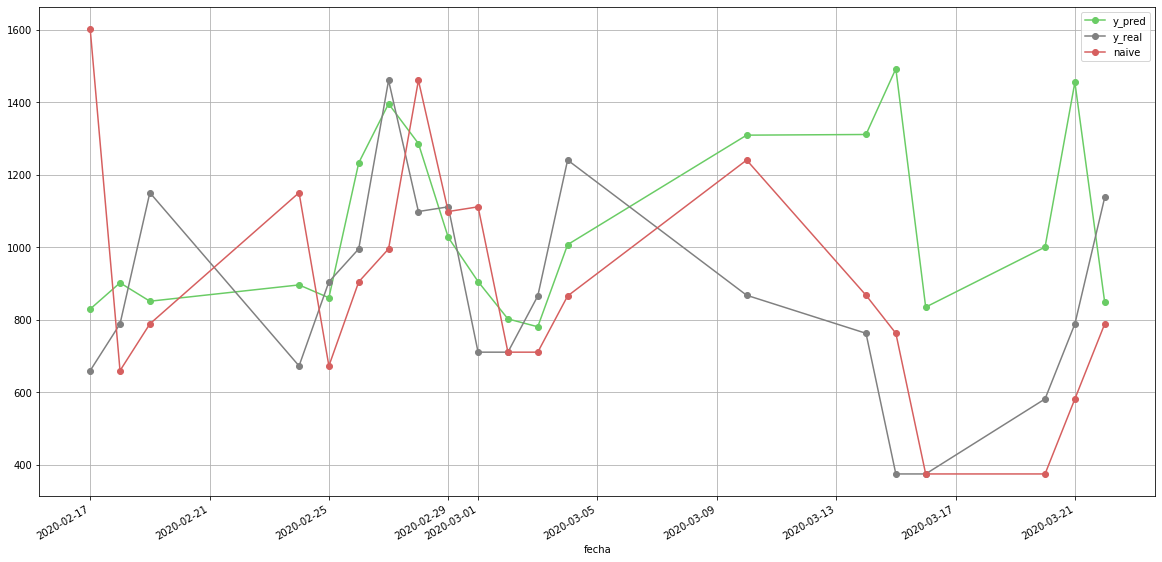

In [71]:
predict.loc[predict.type=="test"].set_index("fecha").plot(figsize=(20,10), color=["#6ACC65", "grey", "#D65F5F"],marker='o')
plt.grid()

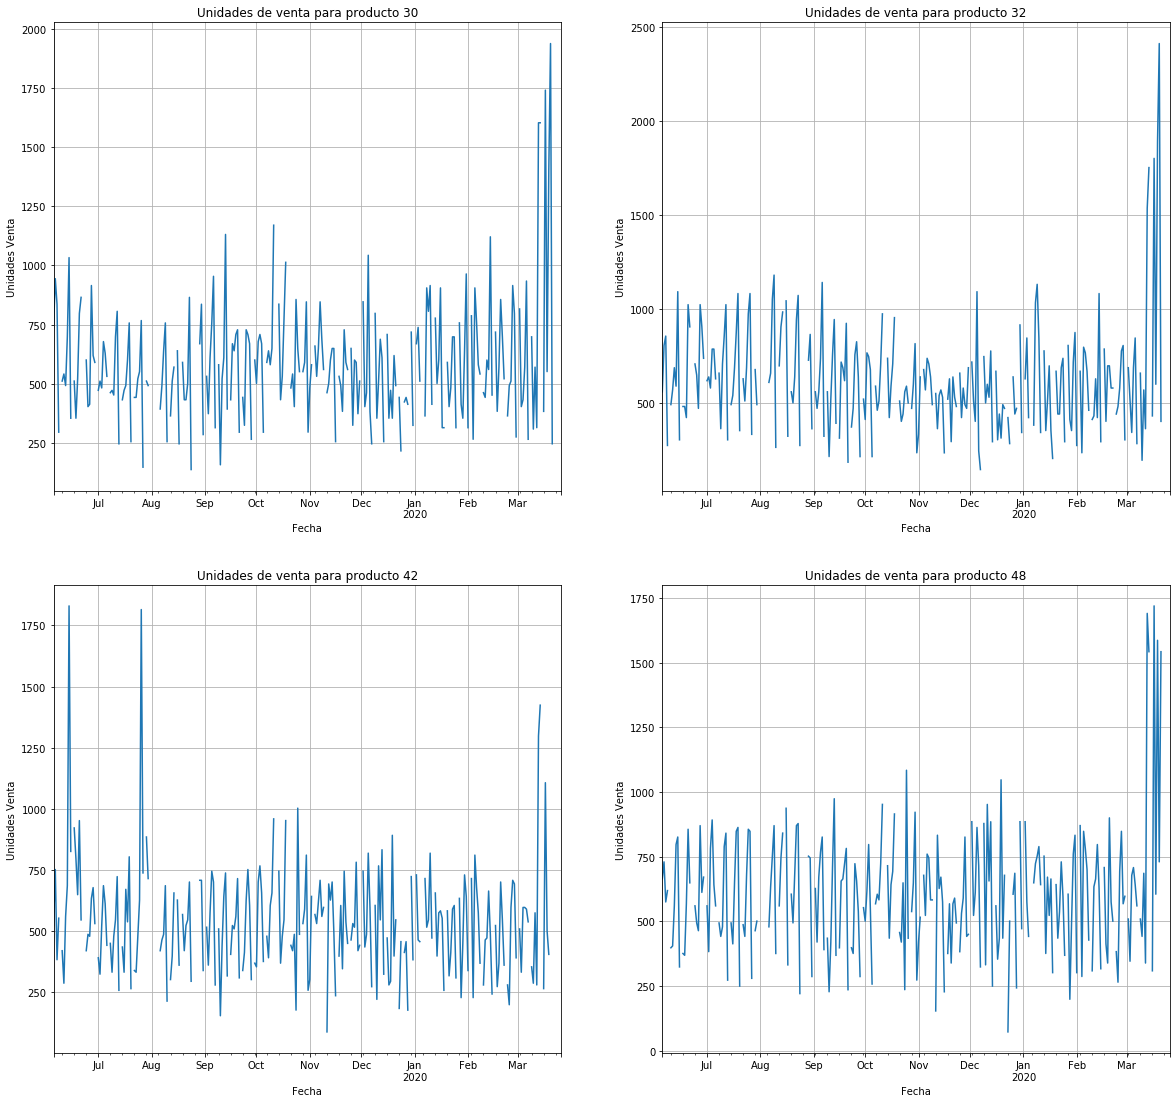

In [7]:
def plot_series2(df):
    df['udsventa'].plot()
    plt.xlabel("Fecha")
    plt.ylabel("Unidades Venta")

plt.figure(figsize=(20,50))

for i, prod in enumerate(["30","32","42","48"]):
    plt.subplot(5,2,i+1)
    prod_data = main_df.loc[main_df.producto == prod].set_index("fecha")
    plot_series2(prod_data)
    plt.title("Unidades de venta para producto {}".format(prod))
    plt.grid(True)
plt.savefig("reports/grupo1/overview_ventas.png")
   

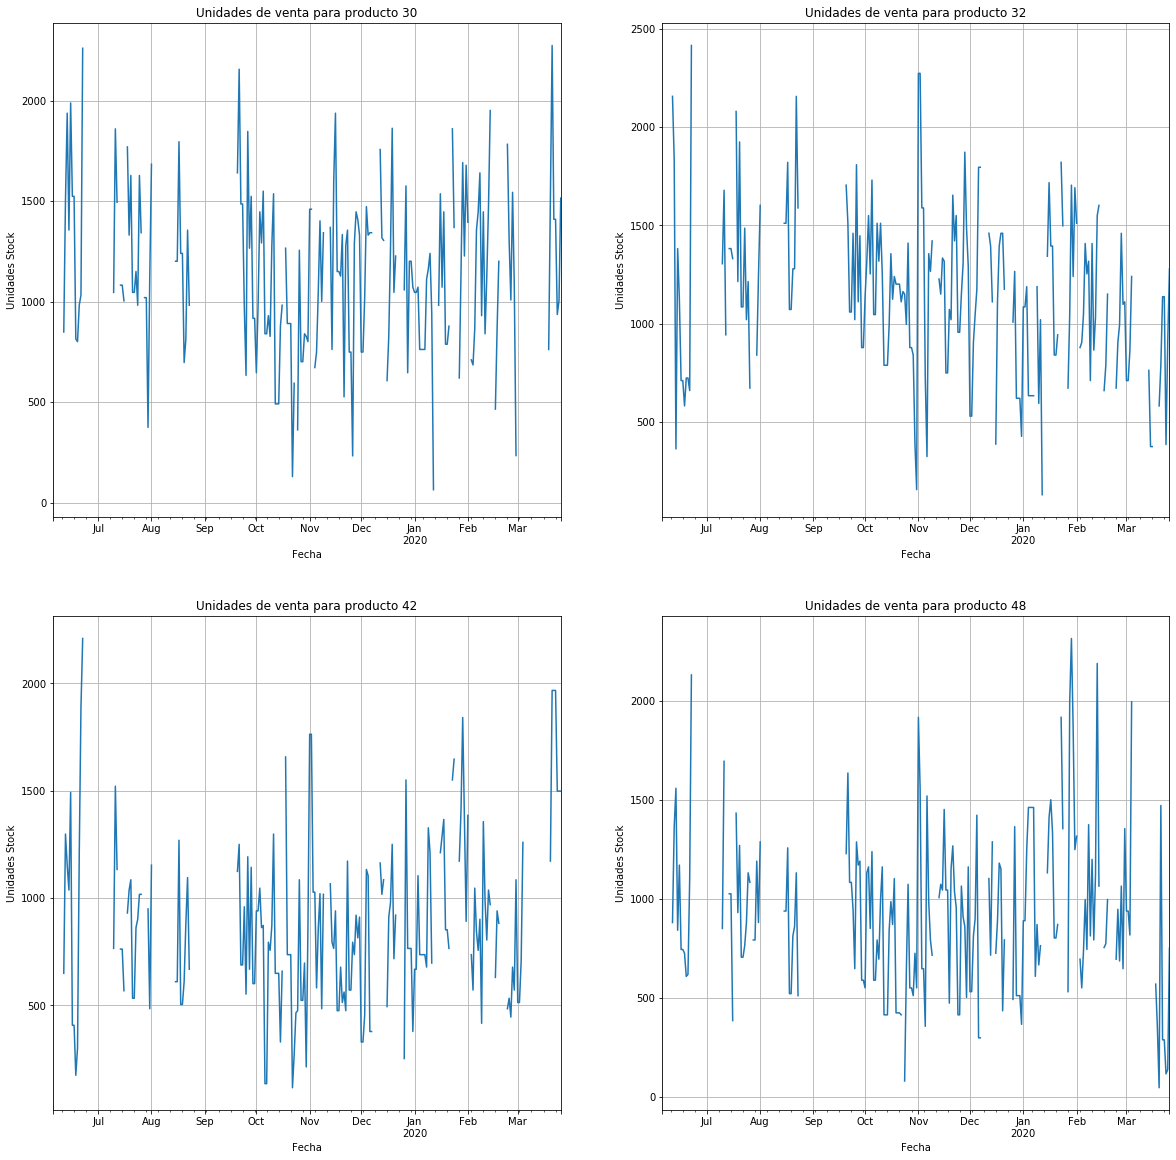

In [79]:

def plot_series2(df):
    df['udsstock'].plot()
    plt.xlabel("Fecha")
    plt.ylabel("Unidades Stock")

plt.figure(figsize=(20,20))

for i, prod in enumerate(["30","32","42","48"]):
    plt.subplot(2,2,i+1)
    prod_data = main_df.loc[main_df.producto == prod].set_index("fecha")
    plot_series2(prod_data)
    plt.title("Unidades de venta para producto {}".format(prod))
    plt.grid(True)
plt.savefig("reports/grupo1/overview_stock.png")

# Entrenamiento producto 30, 32, 42, 48

In [97]:

# Probemos con el 32
from src.trainer import run
from sklearn.ensemble import RandomForestRegressor

def data_producto(data, prod):
    data = data.loc[data.producto == prod]
    data = prepare_train_data(data)

    data = data.loc[data.stockMissingType == 0].reset_index(drop=True)

    data = data[['fecha','producto','udsstock','udsstock_shifted1', 'udsprevisionempresa','udsventa_shifted1']]

    # data = data[["fecha","producto","udsventa","udsprevisionempresa",
    #              "promo", "sin_weekday", "cos_weekday",
    #              "quarter", 'month','udsstock','udsprevisionempresa_shifted1', 'udsprevisionempresa_shifted2',
    #             'udsstock_diff7',"udsventa_diff1", "udsstock_shifted-1"]]

    return data



def unit_train(data, productos, target="udsstock"):
    tags = {"type":"monoproducto",
            "base_model": "random_forest",
            "target":target}
    params = {"n_estimators":200}
    predict_all = pd.DataFrame({})
    for prod in productos:
        tags["name"] = "PR" + prod
        
        data_prod = data_producto(data, prod)
        
        base_model = RandomForestRegressor(n_estimators=200)
        
        _, _, predict = run(data_prod, target, base_model, params, tags)
        
        predict_all = pd.concat([predict_all, predict])
        
    return predict_all

def combi_train(data, productos, target="udsstock"):
    tags = {"type":"monoproducto",
            "base_model": "random_forest",
            "target":target,
            "name": "CL_"}
    params = {"n_estimators":200}
    train_data = pd.DataFrame({})
    for prod in productos:
        tags["name"] = tags["name"] + "_" + prod 
        data_prod = data_producto(data, prod)
        
        train_data = pd.concat([train_data, data_prod]).reset_index(drop=True)
    base_model = RandomForestRegressor(n_estimators=200)
    
    train_data = train_data.sort_values(["fecha","producto"]).reset_index(drop=True)
 
    _, _, predict = run(train_data, target, base_model, params, tags)
    
    return predict

In [139]:
unit_predict = unit_train(main_df, ["30","32", "42","48"])

combi_predict = combi_train(main_df, ["30","32", "42","48"])

===================  FILTER TRAIN DATA  ====================
Dropped rows corresponding to 23 to 26-03-2020 for not having the ventas data for these days.
Rows dropped: 4
Assigned missings in udsventa.
Assigned missings in udsprevisionempresa filling with 0
Assigning missings for udsstock
Missing in dataset:               97 (292 total rows).
Missings in holiday days:         23 (50 total rows).
Missings in working days:         74 (242 total rows).
Assigned missings for working days data with the 4last wd rolling window - Remaining missings: 29
Assigned left missings for working days data with the mean of the weekday - Remaining missings: 23
Assigned missings for holiday data and no active business data - Remaining missings:      0
Get shifted variable for udsprevisionempresa with period -1
Get shifted variable for udsprevisionempresa with period -2
Get shifted variable for udsprevisionempresa with period -3
Get shifted variable for udsprevisionempresa with period -4
Get shifted varia

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Model trained in 0.24590706825256348 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (20, 3)
**********************************************************************
{'mean_error': -60.158, 'std_error': 633.5892880612803, 'r2': -0.03176470612300908, 'predict_out': array([1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1]), 'mae': 468.48549999999994, 'rmse': 608.8718963049616, 'mape': 223.8786091906887, 'smape': 55.77551834744663, 'mase': nan, 'mase_wd': nan, 'train_time': 0.24590706825256348, 'mean_inference_time': 0.0009111762046813965, 'train_size': 175, 'test_size': 20, 'features': 3}
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (175, 3)
**************************************************

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Model trained in 0.25367093086242676 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (36, 3)
**********************************************************************
===============================  TRAINING MODEL  ===============================
Starting training...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (143, 3)
**********************************************************************
Model trained in 0.3105738162994385 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (36, 3)
********************

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Model trained in 0.23920536041259766 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (20, 3)
**********************************************************************
{'mean_error': -171.84125, 'std_error': 363.99900041028616, 'r2': -0.8573379913470147, 'predict_out': array([0, 0, 0, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 2, 2, 7, 0, 0, 5, 0]), 'mae': 283.51424999999995, 'rmse': 372.72638506852445, 'mape': 48.17259213997207, 'smape': 34.77760306732951, 'mase': nan, 'mase_wd': nan, 'train_time': 0.23920536041259766, 'mean_inference_time': 0.0008607745170593262, 'train_size': 179, 'test_size': 20, 'features': 3}
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (179, 3)
**********************************************

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Model trained in 0.2474515438079834 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (35, 3)
**********************************************************************
===============================  TRAINING MODEL  ===============================
Starting training...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (139, 3)
**********************************************************************
Model trained in 0.26551365852355957 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (35, 3)
********************

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Model trained in 0.2658357620239258 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (20, 3)
**********************************************************************
{'mean_error': -10.193499999999986, 'std_error': 491.93137891656187, 'r2': 0.4093484281268942, 'predict_out': array([0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 9]), 'mae': 234.77849999999998, 'rmse': 331.5300795629259, 'mape': 46.44981688291348, 'smape': 39.64179987939126, 'mase': nan, 'mase_wd': nan, 'train_time': 0.2658357620239258, 'mean_inference_time': 0.000749516487121582, 'train_size': 174, 'test_size': 20, 'features': 3}
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (174, 3)
******************************************

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Model trained in 0.23180747032165527 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (36, 3)
**********************************************************************
===============================  TRAINING MODEL  ===============================
Starting training...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (143, 3)
**********************************************************************
Model trained in 0.22663307189941406 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (36, 3)
*******************

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Model trained in 0.27199530601501465 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (20, 3)
**********************************************************************
{'mean_error': -13.35024999999999, 'std_error': 433.9785328316223, 'r2': 0.1611014065399372, 'predict_out': array([1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1]), 'mae': 281.83824999999996, 'rmse': 382.07936123762295, 'mape': 125.65327722517648, 'smape': 40.20662196400566, 'mase': nan, 'mase_wd': nan, 'train_time': 0.27199530601501465, 'mean_inference_time': 0.0009162664413452148, 'train_size': 179, 'test_size': 20, 'features': 3}
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (179, 3)
***************************************

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Model trained in 0.37085700035095215 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (142, 3)
**********************************************************************
===============================  TRAINING MODEL  ===============================
Starting training...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (566, 3)
**********************************************************************
Model trained in 0.38361430168151855 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (142, 3)
*****************

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Model trained in 0.45641064643859863 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (79, 3)
**********************************************************************
{'mean_error': -40.39055907172996, 'std_error': 547.0872806572627, 'r2': 0.22289171620311155, 'predict_out': array([ 2,  4,  4,  3,  7,  8,  7,  7,  6,  6,  7,  6,  6,  2,  2,  2,  3,
        6,  7,  7,  6,  2,  6,  2,  3,  3,  2,  7,  2,  1,  2,  2,  6,  3,
        2,  2,  3,  3,  3,  1,  5,  6,  7,  2,  6,  7,  1,  7,  6,  2,  2,
        2,  6,  2,  2,  2,  2,  5,  2,  2,  2,  2,  7,  2,  6,  2,  6,  6,
        2,  1,  7,  5,  3,  6,  7, 35,  2, 11,  2]), 'mae': 307.8111497890295, 'rmse': 422.55767028970894, 'mape': 112.57004918323335, 'smape': 46.91587748633531, 'mase': nan, 'mase_wd': nan, 'train_time': 0.4564106464385986

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [140]:
combi_predict[["y_pred","fecha","producto"]]

,y_pred,fecha,producto
0,1001.985000,2019-06-05,30
1,567.320000,2019-06-05,32
2,677.815000,2019-06-05,42
3,681.605000,2019-06-05,48
4,935.985000,2019-06-11,30
...,...,...,...
782,646.890000,2020-03-21,48
783,1909.912500,2020-03-22,30
784,972.410000,2020-03-22,32
785,1559.225833,2020-03-22,42


In [141]:
test = unit_predict.merge(combi_predict[["y_pred","fecha","producto"]], on=["fecha","producto"])

test.columns = ["y_unit", "y_real", "type", "fecha", "producto", "y_cluster"]

test

,y_unit,y_real,type,fecha,producto,y_cluster
0,1063.310,1266.0,train,2019-06-05,30,1001.985
1,999.255,849.0,train,2019-06-11,30,935.985
2,1367.030,1508.0,train,2019-06-12,30,1318.960
3,1628.425,1938.0,train,2019-06-13,30,1699.915
4,1367.145,1356.0,train,2019-06-14,30,1446.390
...,...,...,...,...,...,...
782,801.415,571.0,test,2020-03-18,48,820.075
783,813.645,349.0,test,2020-03-19,48,753.265
784,816.835,48.0,test,2020-03-20,48,647.805
785,680.110,1473.0,test,2020-03-21,48,646.890


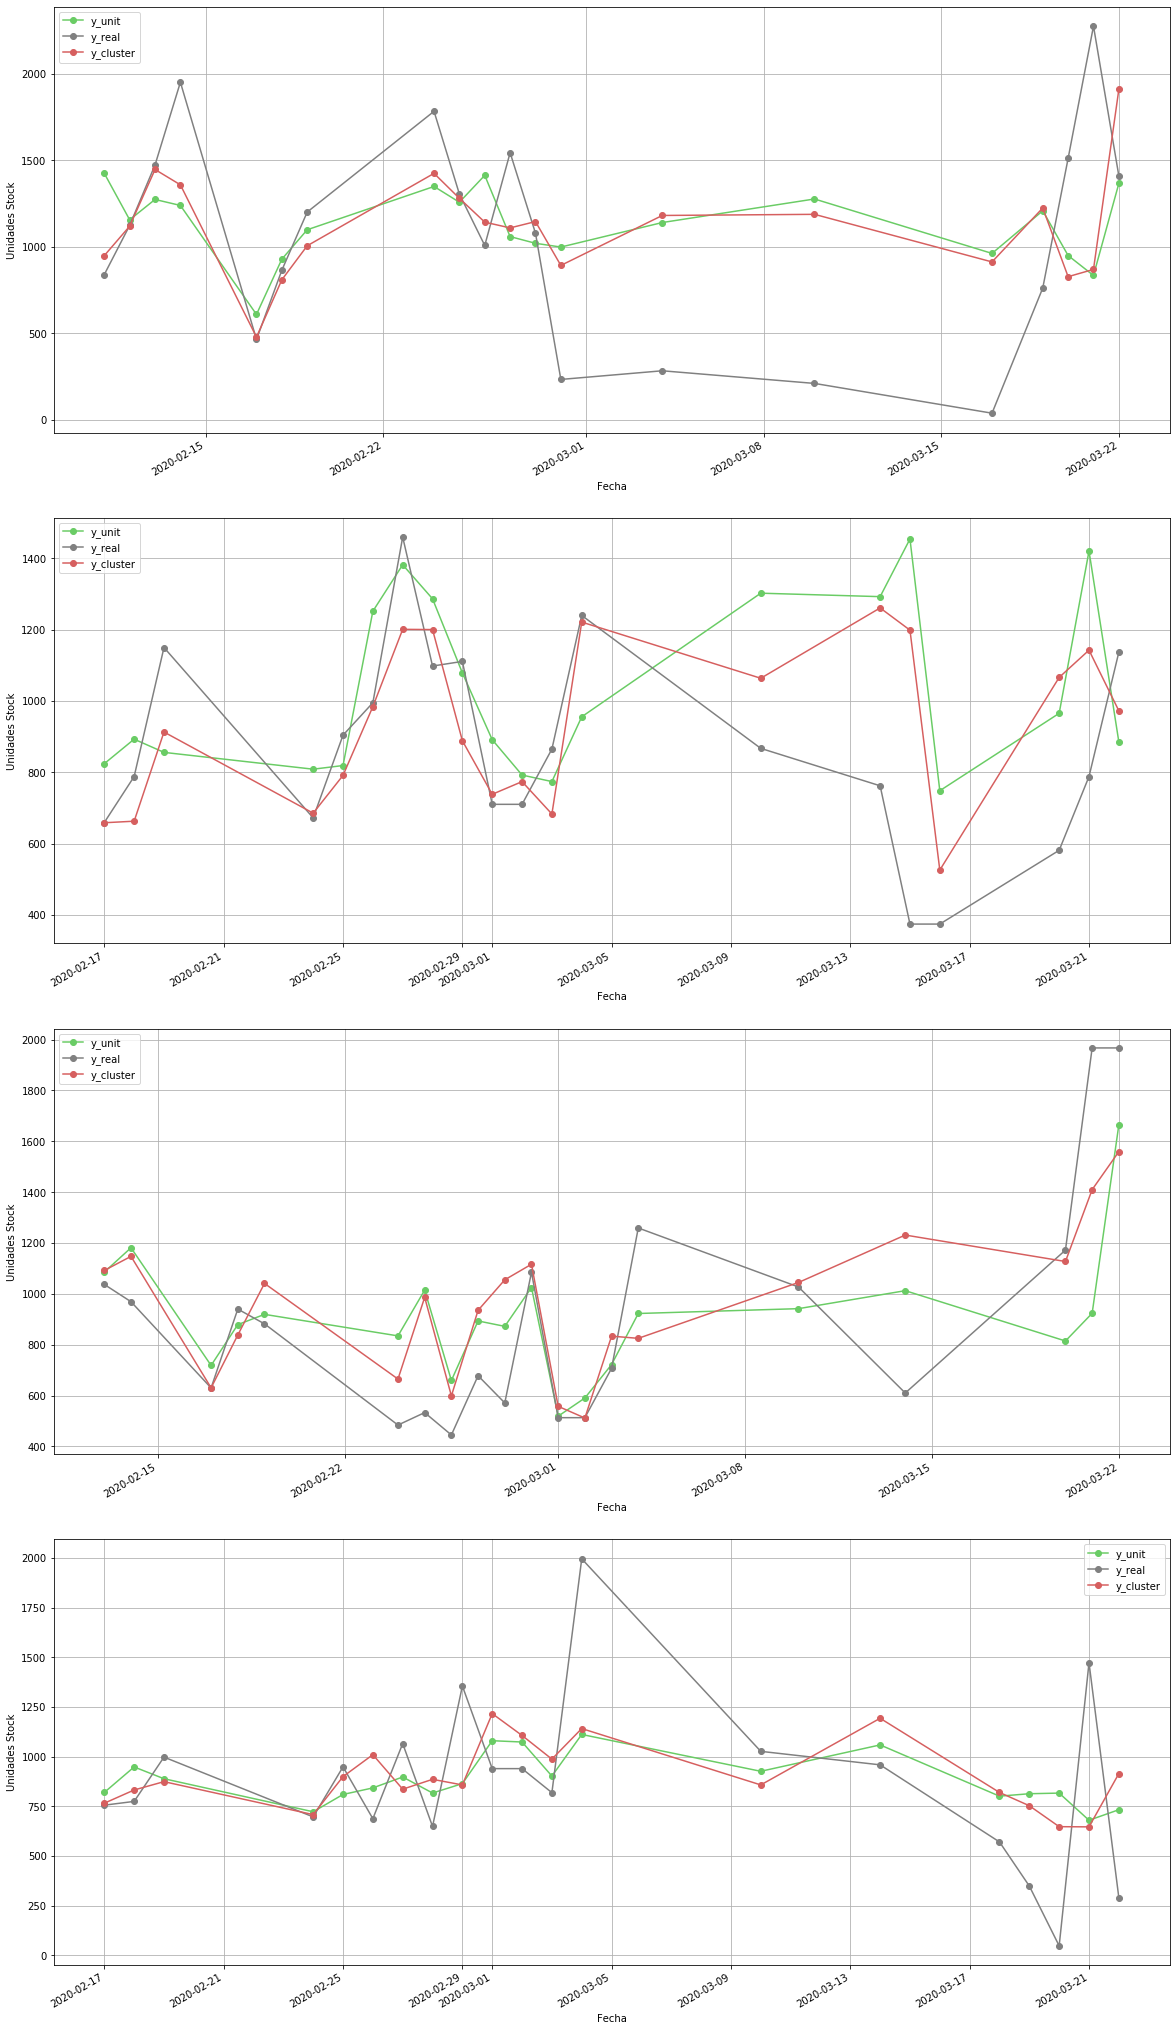

In [161]:
fig, axes = plt.subplots(nrows=4, ncols=1)
i=0
for prod in ["30","32", "42","48"]:
    test_pr = test.loc[(test.producto == prod) & (test.type == "test")].set_index("fecha")

    test_pr[["y_unit", "y_real", "y_cluster"]].plot(figsize=(20,40), ax = axes[i], color=["#6ACC65", "grey", "#D65F5F"],marker='o')
    axes[i].set_xlabel("Fecha")
    axes[i].set_ylabel("Unidades Stock")
    axes[i].grid()
    i += 1
plt.savefig("reports/naive/clustering_preds.png")

In [132]:
met = pd.read_csv("reports/grupo1/runs.csv")

met = met.loc[3:7]

met["name"] = ["CL", "42", "48","32","30"]
met = met.set_index("name")
met["acc"] = 100 - met[["mape_mean"]]

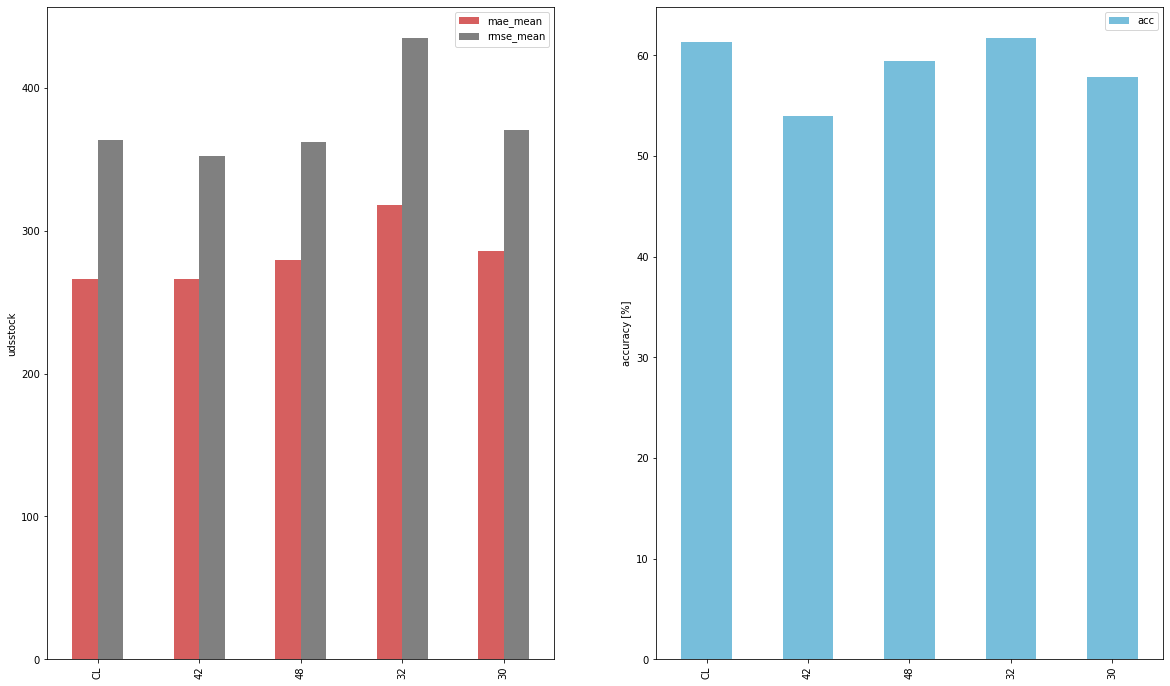

In [134]:
fig, axes = plt.subplots(nrows=1, ncols=2)
met[["mae_mean","rmse_mean"]].plot(figsize=(20,12),ax=axes[0], kind='bar', color=["#D65F5F", "grey"])
axes[0].set_ylabel("udsstock")
axes[0].set_xlabel("")
met[["acc"]].plot(figsize=(20,12),ax=axes[1], kind='bar', color=["#77BEDB", "grey", "grey", "grey","grey"])
axes[1].set_ylabel("accuracy [%]")
axes[1].set_xlabel("")


plt.savefig("reports/naive/clustering_methods.png")

In [142]:
test

,y_unit,y_real,type,fecha,producto,y_cluster
0,1063.310,1266.0,train,2019-06-05,30,1001.985
1,999.255,849.0,train,2019-06-11,30,935.985
2,1367.030,1508.0,train,2019-06-12,30,1318.960
3,1628.425,1938.0,train,2019-06-13,30,1699.915
4,1367.145,1356.0,train,2019-06-14,30,1446.390
...,...,...,...,...,...,...
782,801.415,571.0,test,2020-03-18,48,820.075
783,813.645,349.0,test,2020-03-19,48,753.265
784,816.835,48.0,test,2020-03-20,48,647.805
785,680.110,1473.0,test,2020-03-21,48,646.890


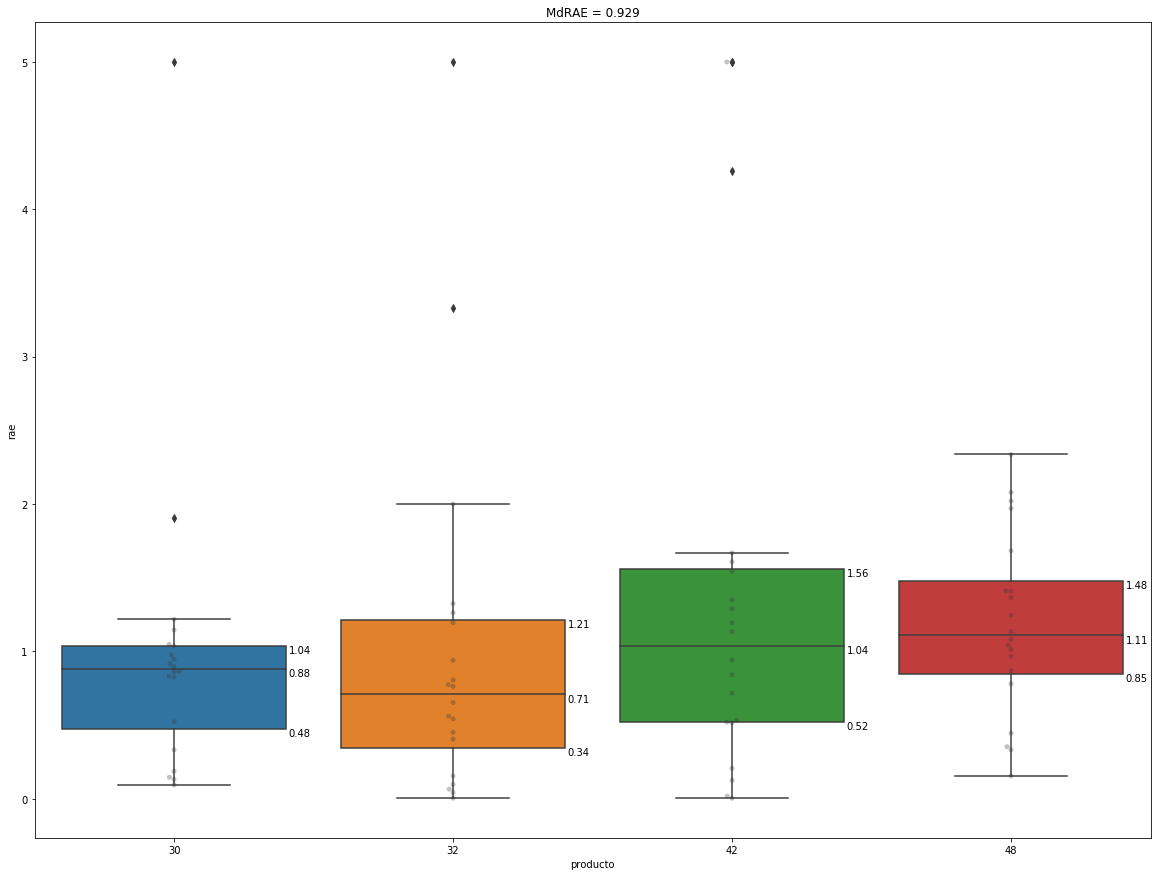

In [156]:
test['rae'] = np.abs(test["y_real"] - test["y_cluster"]) / np.abs(test["y_real"] - test["y_unit"])

test['rae'] = test['rae'].apply(lambda x: min(5, x))

def plot_box(df, numerical, categorical):
    df = df[[numerical,categorical]].dropna()
    plt.figure(figsize=(20,15))
    ax = sns.boxplot(x=categorical, y=numerical, data=df)
    ax = sns.swarmplot(x=categorical, y=numerical, data=df, color=".2", alpha=0.3)

    for i, cat in enumerate(df[categorical].unique()):
        data = df.loc[df[categorical] == cat, numerical]
        data.dropna()
        for quan in [0.25, 0.5, 0.75]:
            ax.text(x=i+0.41, y=data.quantile(quan)-0.05, s = '{}'.format(round(data.quantile(quan),2)))
            
plot_box(test.loc[test.type == "test"], "rae", "producto")
plt.title("MdRAE = {}".format(round(test.loc[test.type == "test", "rae"].median(),3)))
plt.savefig("reports/naive/clustering_rae.png")

In [149]:
test.loc[test.type == "test", "rae"].median()

0.9285494625030721